<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Train-Test Split and Cross-Validation Lab

_Authors: Joseph Nelson (DC), Kiefer Katovich (SF)_

---

## Review of Train/Test Validation Methods

We've discussed overfitting, underfitting, and how to validate the "generalizeability" of your models by testing them on unseen data. 

In this lab you'll practice two related validation methods: 
1. **train/test split**
2. **k-fold cross-validation**

Train/test split and k-fold cross-validation both serve two useful purposes:
- We prevent overfitting by not using all the data, and
- We retain some remaining data to evaluate our model.

In the case of cross-validation, the model fitting and evaluation is performed multiple times on different train/test splits of the data.

Ultimately we can use the training/test validation framework to compare multiple models on the same dataset. This could be comparisons of two linear models, or of completely different models on the same data.


## Instructions

For your independent practice, fit **three different models** on the Boston Housing Data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model that you like. 

**Start with train/test split validation:**
* Fix a testing/training split of the data.
* Train each of your models on the training data.
* Evaluate each of the models on the testing data.
* Rank the models by how well they score on the testing data set.

**Then try k-fold cross-validation:**
* Perform a k-fold cross-validation and use the cross-validation scores to compare your models. Did this change your rankings?
* Try a few different k-splits of the data for the same models.

If you're interested, try a variety of response variables. We start with **MEDV** (the `.target` attribute from the data set load method).

|Column|Type|Description|
|------|----|-----------|
|CRIM|float|per capita crime rate by town
ZN|float|proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS|float|proportion of non-retail business acres per town.
CHAS|float|Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX|float|nitric oxides concentration (parts per 10 million)
RM|float|average number of rooms per dwelling
AGE|float|proportion of owner-occupied units built prior to 1940
DIS|float|weighted distances to five Boston employment centres
RAD|float|index of accessibility to radial highways
TAX|float|full-value property-tax rate per \\$10,000
PTRATIO|float|pupil-teacher ratio by town
B|float|1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT|float|% lower status of the population
MEDV|float|Median value of owner-occupied homes in $1000's

In [69]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve

from sklearn.linear_model import Ridge

from sklearn import metrics

import statistics as stats

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')


In [2]:
# # Original start
# boston = load_boston()

# X = pd.DataFrame(boston.data, columns=boston.feature_names)
# y = boston.target

### 0) Load Boston Data

1. View Keys
2. Find Description
3. Assign X and y

In [3]:
from sklearn.datasets import load_boston

boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
df = pd.DataFrame(boston['data'], columns=boston.feature_names)
df['MEDV'] = pd.DataFrame(boston['target'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target)
print(f'X is a {type(X)}')
print(f'y is a {type(y)}')
X_old = X

X is a <class 'pandas.core.frame.DataFrame'>
y is a <class 'pandas.core.series.Series'>


### 1) Clean up any data problems.

Fix any problems with the data, if applicable.

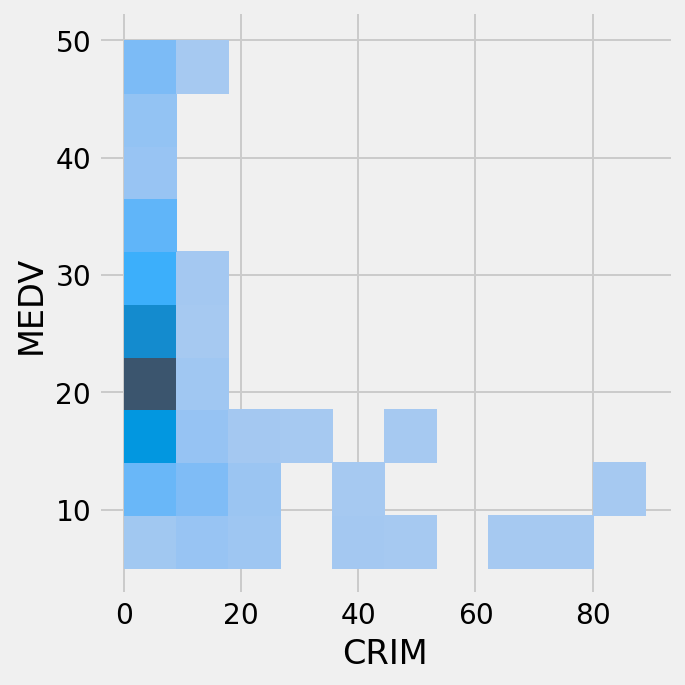

In [40]:
# A:
sns.displot(
    data=df,
    x='CRIM',
    y='MEDV',
    kind='hist',
    bins=10
);

### 2) Select 3–4 variables with your data set on which to perform a 50-50 train/test split.

- Use scikit-learn.
- Score and plot your predictions.

In [8]:
# A:
# Step 1: Assign X and y
X = X_old[['CRIM', 'RM', 'RAD', 'TAX']]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.5
                                                   )
print(f'Original shape: {X.shape}, {y.shape}')
print(f'TRAIN shape:    {X_train.shape}, {y_train.shape}')
print(f'TEST shape:     {X_test.shape}, {y_test.shape}')

Original shape: (506, 4), (506,)
TRAIN shape:    (253, 4), (253,)
TEST shape:     (253, 4), (253,)


In [9]:
# Step 2: Instantiate model
lr = LinearRegression()

In [10]:
# Step 3: Fit the model
lr.fit(X_train, y_train)

LinearRegression()

In [11]:
# Step 4: Check intercept and coefs
print(f'Intercept: {lr.intercept_}')
print(f'Coefficients:', set(zip(X.columns, lr.coef_)))

Intercept: -14.698699492982808
Coefficients: {('RM', 6.940526218624316), ('CRIM', -0.22864664759006653), ('RAD', 0.24978354294296445), ('TAX', -0.018901996092866753)}


In [12]:
# Train MSE
metrics.mean_squared_error(y_train, lr.predict(X_train))

41.33555104977107

In [13]:
# Test MSE
metrics.mean_squared_error(y_test, lr.predict(X_test))

31.967475810301

In [14]:
# Train score
lr.score(X_train, y_train)

0.48386000335646995

In [15]:
# Test score
lr.score(X_test, y_test)

0.6371857829658205

In [16]:
# Cross val score cv=5 (default)
cross_val_score(lr,
                X_train,
                y_train
               ).mean()

0.42869734142342947

In [17]:
# Cross val score cv=10
cross_val_score(lr,
                X_train,
                y_train,
                cv=10
               ).mean()

0.4218135329000196

### 3) Try 70-30 and 90-10.

- Score and plot.  
- How do your metrics change?

In [18]:
# A:
# Step 1: Assign X and y
X = X_old[['CRIM', 'RM', 'RAD', 'TAX']]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.7
                                                   )
print(f'Original shape: {X.shape}, {y.shape}')
print(f'TRAIN shape:    {X_train.shape}, {y_train.shape}')
print(f'TEST shape:     {X_test.shape}, {y_test.shape}')

Original shape: (506, 4), (506,)
TRAIN shape:    (354, 4), (354,)
TEST shape:     (152, 4), (152,)


In [19]:
# Step 2: Initialize lr
lr = LinearRegression()

In [20]:
# Step 3: Fit the model
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
# Step 4: Check intercept and coefs
print(f'Intercept: {lr.intercept_}')
print(f'Coefficients:', set(zip(X.columns, lr.coef_)))

Intercept: -19.03441877122007
Coefficients: {('RM', 7.739160916360584), ('TAX', -0.019152928293090808), ('RAD', 0.1681093848600746), ('CRIM', -0.16535724815461947)}


In [22]:
# Train MSE:
metrics.mean_squared_error(y_train, lr.predict(X_train))

34.75506334852586

In [23]:
# Test Mean Squared Error:
metrics.mean_squared_error(y_test, lr.predict(X_test))

38.66745709822457

In [24]:
# Train score
lr.score(X_train, y_train)

0.5893464532283695

In [25]:
# Test score
lr.score(X_test, y_test)

0.5367918624933323

In [26]:
# Cross val score
cross_val_score(lr,
                X_train,
                y_train
               ).mean()

0.5507566709713491

### Split 90-10

In [27]:
# Step 1: Initiate X and y
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.9
                                                   )

In [28]:
# Step 2: Initialize lr
lr = LinearRegression()

In [29]:
# Step 3: Fit the model
lr.fit(X_train, y_train)

LinearRegression()

In [30]:
# Step 4: Check intercept and coef
print(f'Intercept: {lr.intercept_}')
print(f'Coefficients:', set(zip(X.columns, lr.coef_)))

Intercept: -22.68750457527334
Coefficients: {('RM', 8.283412331302648), ('TAX', -0.019041205188410786), ('CRIM', -0.13780921320733927), ('RAD', 0.12945567446880393)}


In [31]:
# Train MSE
metrics.mean_squared_error(y_train, lr.predict(X_train))

32.36256928893857

In [32]:
# Test MSE
metrics.mean_squared_error(y_test, lr.predict(X_test))

69.50516857212129

In [33]:
# Train score
lr.score(X_train, y_train)

0.6158331714834027

In [34]:
# Test score
lr.score(X_test, y_test)

0.19146211013733172

In [35]:
# Cross val score
cross_val_score(lr,
                X_train, 
                y_train,
               ).mean()

0.6010551201312984

In [36]:
# Cross val score cv=10
cross_val_score(lr,
                X_train, 
                y_train,
                cv=10
               ).mean()

0.5892783247440567

### 4) Try k-folds cross-validation with k between 5–10 for your regression. 

- What seems optimal? 
- How do your scores change?  
- What is the variance of scores like?
- Try out different folds to get a sense of how this impacts your score.

In [75]:
k_fold = [5, 6, 7, 8, 9, 10]

CVS_list = []
for num in k_fold:
    print(f'CV: {num}, MSE: {cross_val_score(lr, X_train, y_train, cv=num).mean()}')
    CVS_list.append(cross_val_score(lr, X_train, y_train, cv=num).mean())

print(max(CVS_list))

# Optimal k-fold is the highest R^2, found when cv=8.
# Scores be decreasing but peak at CV = 8
# Variance of scores are very low


stats.variance(CVS_list)

CV: 5, MSE: 0.6010551201312984
CV: 6, MSE: 0.6006970993581822
CV: 7, MSE: 0.5977697469066998
CV: 8, MSE: 0.6013617854276121
CV: 9, MSE: 0.6010377173498473
CV: 10, MSE: 0.5892783247440567
0.6013617854276121


2.2310324165585198e-05

In [77]:
k_fold_2 = [i for i in range(2, 14)]

CVS_list = []
for num in k_fold_2:
    print(f'CV: {num}, MSE: {cross_val_score(lr, X_train, y_train, cv=num).mean()}')
    CVS_list.append(cross_val_score(lr, X_train, y_train, cv=num).mean())

print(max(CVS_list))

stats.variance(CVS_list)

# The variance between scores are minimal (9E-5)
# The best k-fold is 3

CV: 2, MSE: 0.5974623373673307
CV: 3, MSE: 0.6063829920781209
CV: 4, MSE: 0.6035078665108111
CV: 5, MSE: 0.6010551201312984
CV: 6, MSE: 0.6006970993581822
CV: 7, MSE: 0.5977697469066998
CV: 8, MSE: 0.6013617854276121
CV: 9, MSE: 0.6010377173498473
CV: 10, MSE: 0.5892783247440567
CV: 11, MSE: 0.6020308821823951
CV: 12, MSE: 0.5984835914913709
CV: 13, MSE: 0.5705810208065505
0.6063829920781209


8.900716161785497e-05

### 5) [Bonus] Optimize the $R^2$ score.

Can you optimize your R^2 by selecting the best features and validating the model using either train/test split or k-folds?

Your code will need to iterate through the different combinations of predictors, cross-validate the current model parameterization, and determine which set of features performed best.

The number of k-folds is up to you.

> *Hint:* The `itertools` package is useful for combinations and permutations.

In [38]:
# A:

### 5.1) Explain what could be wrong with this approach.

### 6) [Bonus] Explore another target variable and practice Patsy formulas.

Can you find another response variable, given a combination of predictors, that can be predicted accurately through the exploration of different predictors in this data set?

**Try using Patsy to construct your target and predictor matrices from formula strings.**

> *Tip: Check out pairplots, coefficients, and Pearson scores.*

In [39]:
import patsy

# A: